In [1]:
import pandas as pd

In [2]:
data = pd.read_parquet("../data/Zzzs_train.parquet")

FileNotFoundError: [Errno 2] No such file or directory: '../data/Zzzs_train.parquet'

In [46]:
data.head()

,series_id,step,timestamp,anglez,enmo,awake
0,08db4255286f,0,2018-11-05T10:00:00-0400,-30.845301,0.0447,1
1,08db4255286f,1,2018-11-05T10:00:05-0400,-34.181801,0.0443,1
2,08db4255286f,2,2018-11-05T10:00:10-0400,-33.877102,0.0483,1
3,08db4255286f,3,2018-11-05T10:00:15-0400,-34.282101,0.0680,1
4,08db4255286f,4,2018-11-05T10:00:20-0400,-34.385799,0.0768,1


In [47]:
data.shape

(13165560, 6)

In [48]:
data["step"] = data["step"].astype(int)
data["anglez"] = data["anglez"].astype(float)
data["enmo"] = data["enmo"].astype(float)
data["awake"] = data["awake"].astype(bool)


In [49]:
data["series_id"].unique()

array(['08db4255286f', '0a96f4993bd7', '0cfc06c129cc', '1087d7b0ff2e',
       '10f8bc1f7b07', '18b61dd5aae8', '29c75c018220', '3452b878e596',
       '349c5562ee2c', '3664fe9233f9', '483d6545417f', '55a47ff9dc8a',
       '5acc9d63b5fd', '5f94bb3e1bed', '655f19eabf1e', '67f5fc60e494',
       '72bbd1ac3edf', '76237b9406d5', '7822ee8fe3ec', '89bd631d1769',
       '8e32047cbc1f', '939932f1822d', '9ee455e4770d', 'a9a2f7fac455',
       'a9e5f5314bcb', 'af91d9a50547', 'b364205aba43', 'c535634d7dcd',
       'c6788e579967', 'c68260cc9e8f', 'ca730dbf521d', 'd150801f3145',
       'd25e479ecbb7', 'd515236bdeec', 'd5e47b94477e'], dtype=object)

In [50]:
less_series = data.groupby("series_id")["step"].count().sort_values()[:3].index.values

In [51]:
truncated_data = data[data["series_id"].isin(less_series)].reset_index()

In [ ]:
# save truncated data

In [16]:
truncated_data = pd.read_csv("../data/truncated_dataset.csv").drop("Unnamed: 0", axis=1)

In [17]:
truncated_data.head()

,index,series_id,step,timestamp,anglez,enmo,awake
0,3380400,349c5562ee2c,0,2019-02-08T12:00:00-0500,-88.683701,0.0,True
1,3380401,349c5562ee2c,1,2019-02-08T12:00:05-0500,-88.683701,0.0,True
2,3380402,349c5562ee2c,2,2019-02-08T12:00:10-0500,-88.683701,0.0,True
3,3380403,349c5562ee2c,3,2019-02-08T12:00:15-0500,-88.683701,0.0,True
4,3380404,349c5562ee2c,4,2019-02-08T12:00:20-0500,-88.683701,0.0,True


In [24]:
truncated_data['timestamp'] = pd.to_datetime(truncated_data['timestamp'])

/tmp/ipykernel_4603/3648499738.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  truncated_data['timestamp'] = pd.to_datetime(truncated_data['timestamp'])


In [25]:
truncated_data["timestamp"][1] - truncated_data["timestamp"][0]

Timedelta('0 days 00:00:05')

In [26]:
truncated_data.head()

,index,series_id,step,timestamp,anglez,enmo,awake
0,3380400,349c5562ee2c,0,2019-02-08 12:00:00-05:00,-88.683701,0.0,True
1,3380401,349c5562ee2c,1,2019-02-08 12:00:05-05:00,-88.683701,0.0,True
2,3380402,349c5562ee2c,2,2019-02-08 12:00:10-05:00,-88.683701,0.0,True
3,3380403,349c5562ee2c,3,2019-02-08 12:00:15-05:00,-88.683701,0.0,True
4,3380404,349c5562ee2c,4,2019-02-08 12:00:20-05:00,-88.683701,0.0,True


In [28]:
truncated_data["series_id"].unique()

array(['349c5562ee2c', 'a9e5f5314bcb', 'c535634d7dcd'], dtype=object)

In [29]:
truncated_data.shape

(328320, 7)

In [30]:
truncated_data.groupby("series_id")["step"].count()

series_id
349c5562ee2c     37080
a9e5f5314bcb    155160
c535634d7dcd    136080
Name: step, dtype: int64

In [31]:
truncated_data["anglez"].diff().bfill().mean()

0.0002116599684802649

<Axes: >

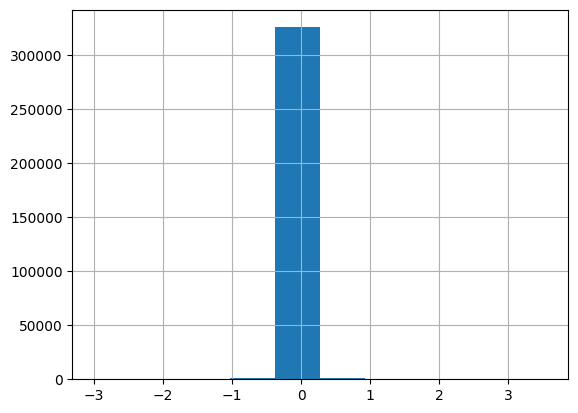

In [66]:
truncated_data["enmo"].diff().bfill().hist()

In [89]:
import matplotlib.pyplot as plt 
import numpy as np

In [98]:
periods = (np.linspace(1, 10, 40) ** 2).astype(int)

In [101]:
periods

array([  1,   1,   2,   2,   3,   4,   5,   6,   8,   9,  10,  12,  14,
        16,  17,  19,  22,  24,  26,  28,  31,  34,  36,  39,  42,  45,
        49,  52,  55,  59,  62,  66,  70,  74,  78,  82,  86,  90,  95,
       100])

In [102]:
fig, axis = plt.subplots(10, 2, figsize=(10, 20))


np.exp(10)
for period in periods:
    print(f"{period = }\t",
    f"{truncated_data['anglez'].diff(periods=period).bfill().var():.2f} \t",
    f"{truncated_data['enmo'].diff(periods=period).bfill().var():.2f}",
    )

period = 1	 144.45 	 0.01
period = 1	 144.45 	 0.01
period = 2	 276.13 	 0.01
period = 2	 276.13 	 0.01
period = 3	 349.72 	 0.01
period = 4	 403.60 	 0.01
period = 5	 448.41 	 0.01
period = 6	 486.74 	 0.01
period = 8	 551.86 	 0.01
period = 9	 579.66 	 0.01
period = 10	 605.80 	 0.01
period = 12	 653.95 	 0.01
period = 14	 698.36 	 0.01
period = 16	 739.23 	 0.01
period = 17	 758.70 	 0.01
period = 19	 795.32 	 0.01
period = 22	 845.30 	 0.01
period = 24	 877.97 	 0.01
period = 26	 910.28 	 0.01
period = 28	 940.53 	 0.01
period = 31	 983.60 	 0.01
period = 34	 1021.30 	 0.01
period = 36	 1047.33 	 0.01
period = 39	 1085.04 	 0.01
period = 42	 1118.55 	 0.01
period = 45	 1149.29 	 0.01
period = 49	 1195.72 	 0.01
period = 52	 1227.03 	 0.01
period = 55	 1258.69 	 0.01
period = 59	 1296.93 	 0.01
period = 62	 1324.01 	 0.01
period = 66	 1360.76 	 0.01
period = 70	 1392.88 	 0.01
period = 74	 1419.83 	 0.01
period = 78	 1447.09 	 0.01
period = 82	 1475.94 	 0.01
period = 86	 1501.19 	 

In [44]:
truncated_data["timestamp"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 328320 entries, 0 to 328319
Series name: timestamp
Non-Null Count   Dtype 
--------------   ----- 
328320 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


In [56]:
h = truncated_data.head()
# print(type(h))
# print(h)
print(h.applymap(type))

           index      series_id           step      timestamp  \
0  <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
1  <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
2  <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
3  <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   
4  <class 'int'>  <class 'str'>  <class 'int'>  <class 'str'>   

            anglez             enmo           awake  
0  <class 'float'>  <class 'float'>  <class 'bool'>  
1  <class 'float'>  <class 'float'>  <class 'bool'>  
2  <class 'float'>  <class 'float'>  <class 'bool'>  
3  <class 'float'>  <class 'float'>  <class 'bool'>  
4  <class 'float'>  <class 'float'>  <class 'bool'>  


/tmp/ipykernel_4603/4193286828.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(h.applymap(type))


In [72]:
truncated_data = pd.read_csv("../data/truncated_dataset.csv", index_col="Unnamed: 0")

In [74]:
truncated_data['timestamp'] = pd.to_datetime(truncated_data['timestamp'], utc=True)

In [77]:
truncated_data.head()

,index,series_id,step,timestamp,anglez,enmo,awake
0,3380400,349c5562ee2c,0,2019-02-08 17:00:00+00:00,-88.683701,0.0,True
1,3380401,349c5562ee2c,1,2019-02-08 17:00:05+00:00,-88.683701,0.0,True
2,3380402,349c5562ee2c,2,2019-02-08 17:00:10+00:00,-88.683701,0.0,True
3,3380403,349c5562ee2c,3,2019-02-08 17:00:15+00:00,-88.683701,0.0,True
4,3380404,349c5562ee2c,4,2019-02-08 17:00:20+00:00,-88.683701,0.0,True


In [75]:
truncated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328320 entries, 0 to 328319
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   index      328320 non-null  int64              
 1   series_id  328320 non-null  object             
 2   step       328320 non-null  int64              
 3   timestamp  328320 non-null  datetime64[ns, UTC]
 4   anglez     328320 non-null  float64            
 5   enmo       328320 non-null  float64            
 6   awake      328320 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(2), object(1)
memory usage: 17.8+ MB


/tmp/ipykernel_4603/3648499738.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  truncated_data['timestamp'] = pd.to_datetime(truncated_data['timestamp'])


In [86]:
truncated_data.set_index("timestamp")[["anglez", "enmo"]].resample("20min").mean()

,anglez,enmo
timestamp,,
2017-10-05 17:40:00+00:00,-6.478370,0.050052
2017-10-05 18:00:00+00:00,-6.987011,0.097066
2017-10-05 18:20:00+00:00,-27.111498,0.018924
2017-10-05 18:40:00+00:00,-10.548170,0.095774
2017-10-05 19:00:00+00:00,5.448621,0.072474
...,...,...
2019-07-05 11:40:00+00:00,2.108853,0.049870
2019-07-05 12:00:00+00:00,-8.341466,0.099837
2019-07-05 12:20:00+00:00,-10.826843,0.118246


In [50]:
import datetime

# this line converts the string object in Timestamp object
truncated_data['DateTime'] = [datetime.datetime.strptime(d, "%Y-%m-%dT%H:%M:%S", tim) for d in truncated_data["timestamp"]]

# extracting date from timestamp
truncated_data['Date'] = [datetime.datetime.date(d) for d in truncated_data['DateTime']] 

# extracting time from timestamp
truncated_data['Time'] = [datetime.datetime.time(d) for d in truncated_data['DateTime']] 

ValueError: time data '2019-02-08T12:00:00-0500' does not match format '%Y-%m-%dT%H:%M:%S*'